<a href="https://colab.research.google.com/github/jkabila/Dataset9-Chennaihouseprediction/blob/main/Chennai_House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#for data reading
import pandas as pd
import numpy as np
import statistics as stats
#for data visualization
import matplotlib.pyplot as plt
import plotly.express as px

**Loading data**

In [2]:
path="/content/Chennai houseing sale.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
pd.set_option("display.max_columns",None)
df.head()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
df.shape

(7109, 22)

In [6]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [7]:
df.columns=[column.lower() for column in df.columns]

In [8]:
df.columns

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

In [9]:
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [10]:
df.drop(columns=["prt_id","reg_fee","commis"],inplace=True)

In [11]:
df.shape

(7109, 19)


**Cleaning**

In [12]:
#handling missing values
df.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [13]:
#filling the null values
df=df.fillna({"n_bedroom":stats.mode(df['n_bedroom']),
               'n_bathroom':stats.mode(df['n_bathroom']),
               'qs_overall':df['qs_overall'].mean()})

In [14]:
df.isnull().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

In [15]:
df.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

In [16]:
#correcting data into right format
df['n_bedroom']=df['n_bedroom'].astype(int)
df['n_bathroom']=df['n_bathroom'].astype(int)



In [17]:
df['date_sale']=pd.to_datetime(df["date_sale"],format='mixed')
df['date_build']=pd.to_datetime(df["date_build"],format='mixed')

In [18]:
df['house_age']=df["date_sale"].dt.year - df['date_build'].dt.year

In [19]:
df['house_age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: house_age, Length: 7109, dtype: int32

In [20]:
df.drop(columns=['date_sale','date_build'],inplace=True)

In [21]:
df.shape

(7109, 18)

In [22]:
#area
df['area'].value_counts()

area
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

In [23]:
df['area']=df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar',
                               'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
                               'Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [24]:
df['area'].value_counts()

area
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

In [25]:
df.columns

Index(['area', 'int_sqft', 'dist_mainroad', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'sales_price', 'house_age'],
      dtype='object')

In [26]:
#sale_cond
df['sale_cond'].value_counts()

sale_cond
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: count, dtype: int64

In [27]:
df['sale_cond']=df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial',"PartiaLl":'Partial'})

In [28]:
df['sale_cond'].value_counts()

sale_cond
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

In [29]:
#park_facil
df["park_facil"].value_counts()

park_facil
Yes    3587
No     3520
Noo       2
Name: count, dtype: int64

In [30]:
df["park_facil"]=df["park_facil"].replace({'Noo':'No'})

In [31]:
df['buildtype'].value_counts()

buildtype
House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: count, dtype: int64

In [32]:
df["buildtype"]=df["buildtype"].replace({'Comercial':'Commercial',"Other":'Others'})

In [33]:
df['buildtype'].value_counts()

buildtype
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

In [34]:
#utility_avail
df['utility_avail'].value_counts()

utility_avail
AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: count, dtype: int64

In [35]:
df["utility_avail"]=df["utility_avail"].replace({'All Pub':'AllPub'})

In [36]:
df['utility_avail'].value_counts()

utility_avail
AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: count, dtype: int64

In [37]:
#street
df['street'].value_counts()

street
Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: count, dtype: int64

In [38]:
df['street']=df["street"].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [39]:
df['street'].value_counts()

street
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

In [40]:

#duplicates
df=df.drop_duplicates()

In [41]:
df.shape

(7109, 18)

**Data visualization**

In [42]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [43]:
import seaborn as sns

In [44]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

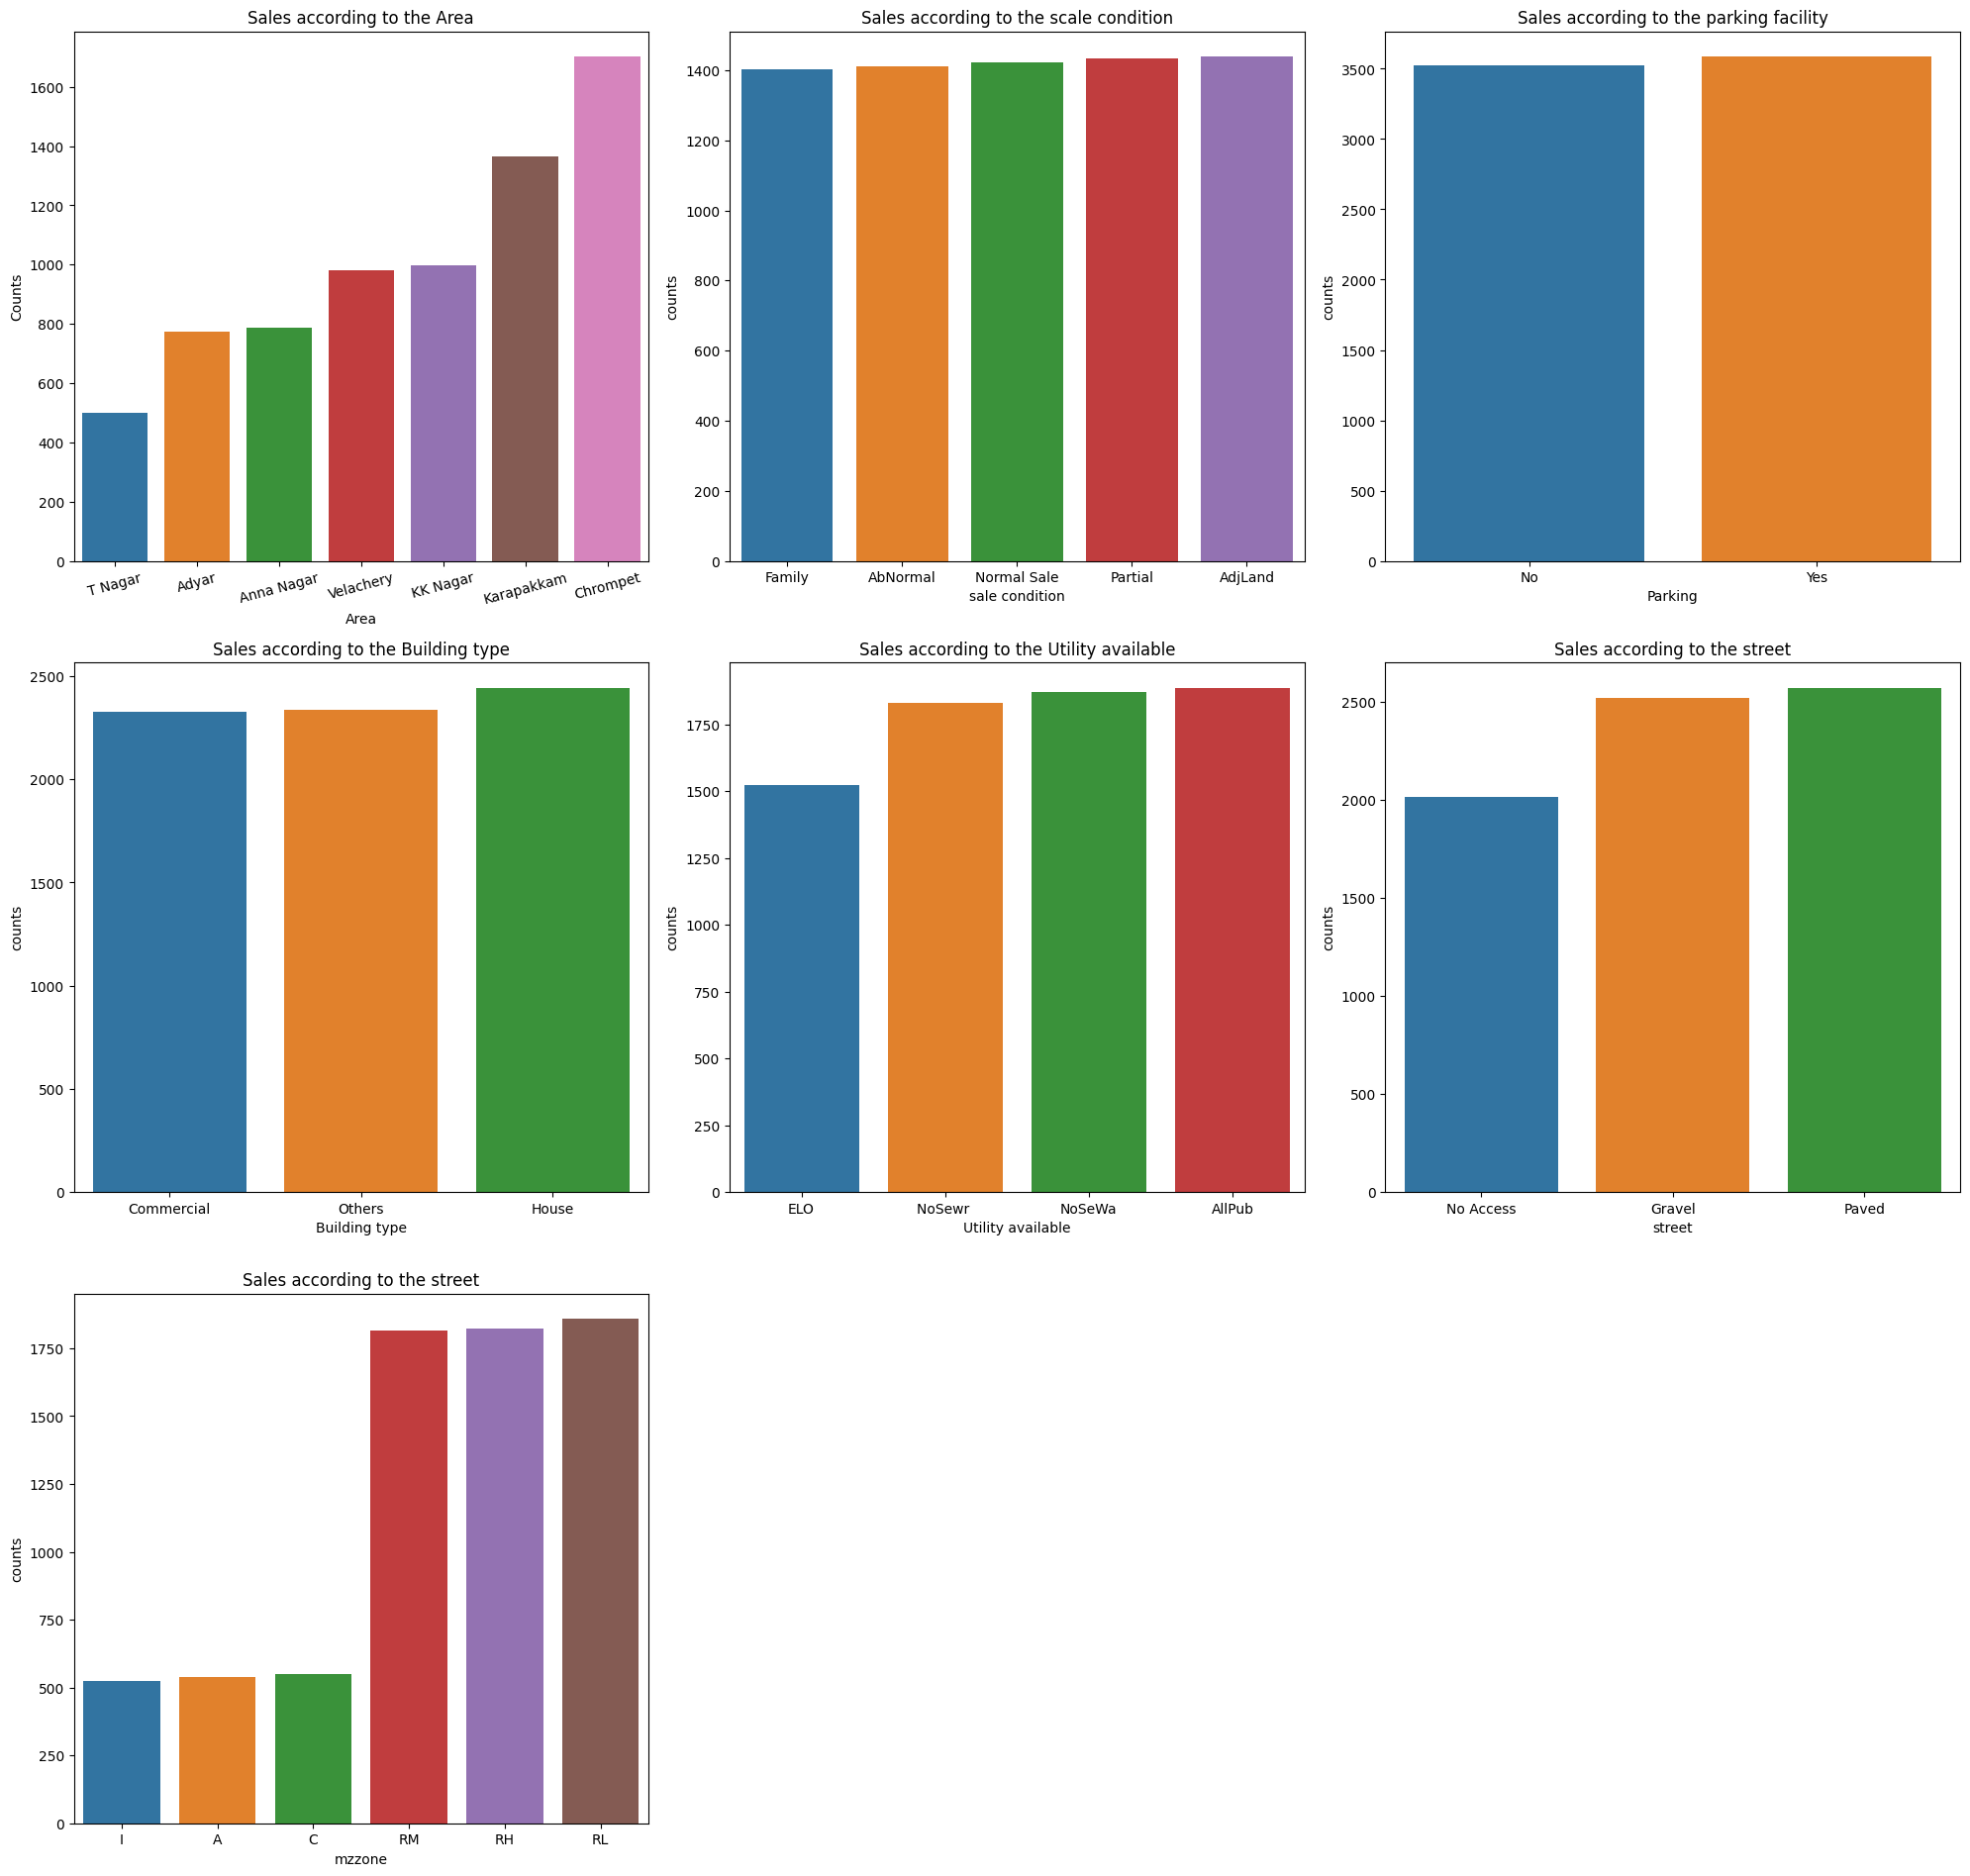

In [45]:

#plotting coubt values for all catogorical columns

#area
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xlabel("Area")
plt.ylabel("Counts")
plt.title("Sales according to the Area")
plt.xticks(rotation=15)
#sale_cond
plt.subplot(432)
sns.countplot(df['sale_cond'],order=df["sale_cond"].value_counts().index[::-1])
plt.xlabel("sale condition")
plt.ylabel('counts')
plt.title("Sales according to the scale condition")
#park_facil
plt.subplot(433)
sns.countplot(df['park_facil'],order=df["park_facil"].value_counts().index[::-1])
plt.xlabel("Parking")
plt.ylabel('counts')
plt.title("Sales according to the parking facility")
#buildtype
plt.subplot(434)
sns.countplot(df['buildtype'],order=df["buildtype"].value_counts().index[::-1])
plt.xlabel("Building type")
plt.ylabel('counts')
plt.title("Sales according to the Building type")
#utility_avail
plt.subplot(435)
sns.countplot(df['utility_avail'],order=df["utility_avail"].value_counts().index[::-1])
plt.xlabel("Utility available")
plt.ylabel('counts')
plt.title("Sales according to the Utility available")
#street
plt.subplot(436)
sns.countplot(df['street'],order=df["street"].value_counts().index[::-1])
plt.xlabel("street")
plt.ylabel('counts')
plt.title("Sales according to the street")
#mzzone
plt.subplot(437)
sns.countplot(df['mzzone'],order=df["mzzone"].value_counts().index[::-1])
plt.xlabel("mzzone")
plt.ylabel('counts')
plt.title("Sales according to the street")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

Text(0.5, 1.0, 'mzzone vs Mean scales price')

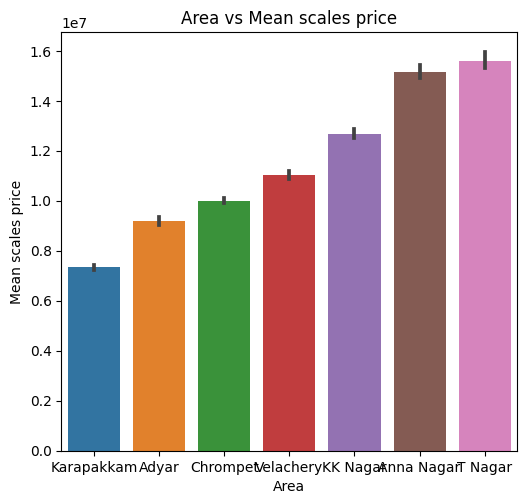

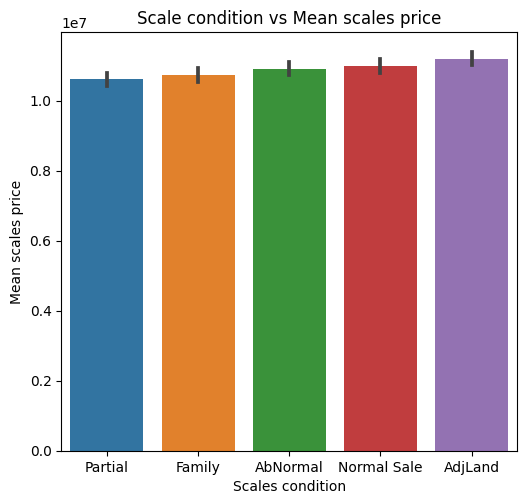

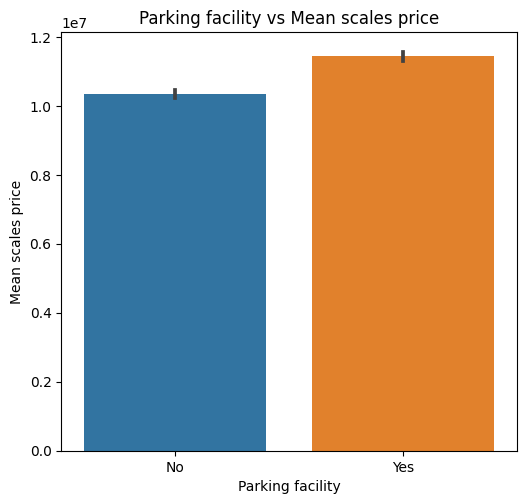

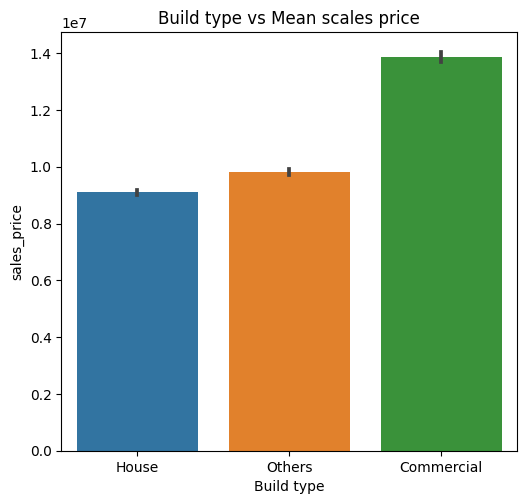

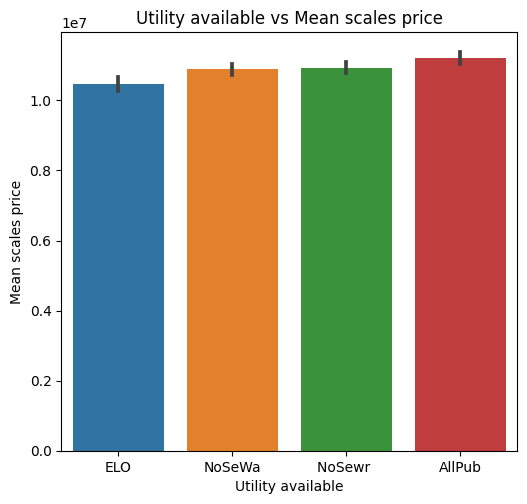

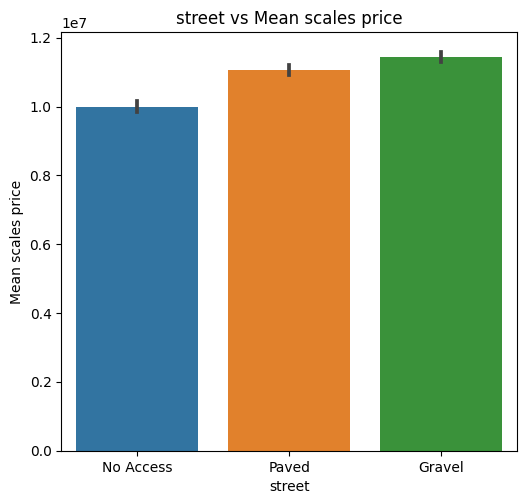

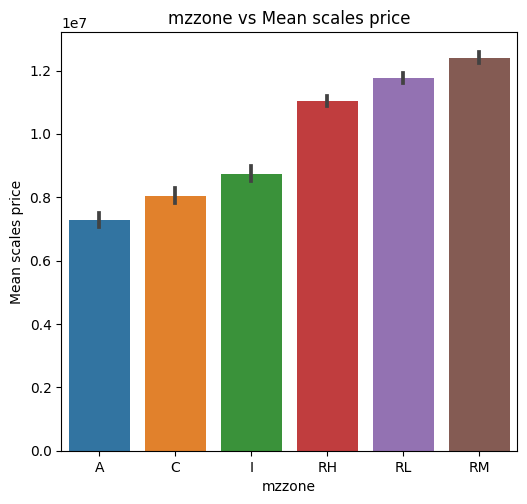

In [46]:
#Area vs scale
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=df.groupby('area')["sales_price"].mean().reset_index().sort_values('sales_price')['area'])
plt.xlabel('Area')
plt.ylabel('Mean scales price')
plt.title('Area vs Mean scales price')
#sale_cond vs scale
plt.figure(figsize=(20,25))
plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=df.groupby('sale_cond')["sales_price"].mean().reset_index().sort_values('sales_price')['sale_cond'])
plt.xlabel('Scales condition')
plt.ylabel('Mean scales price')
plt.title('Scale condition vs Mean scales price')
#park_facil vs scale
plt.figure(figsize=(20,25))
plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=df.groupby('park_facil')["sales_price"].mean().reset_index().sort_values('sales_price')['park_facil'])
plt.xlabel('Parking facility')
plt.ylabel('Mean scales price')
plt.title('Parking facility vs Mean scales price')
#buildtype vs scale
plt.figure(figsize=(20,25))
plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=df.groupby('buildtype')["sales_price"].mean().reset_index().sort_values('sales_price')['buildtype'])
plt.xlabel('Build type')
plt.title('Build type vs Mean scales price')
#utility_avail vs scale
plt.figure(figsize=(20,25))
plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=df.groupby('utility_avail')["sales_price"].mean().reset_index().sort_values('sales_price')['utility_avail'])
plt.xlabel('Utility available')
plt.ylabel('Mean scales price')
plt.title('Utility available vs Mean scales price')
#street vs scale
plt.figure(figsize=(20,25))
plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=df.groupby('street')["sales_price"].mean().reset_index().sort_values('sales_price')['street'])
plt.xlabel('street')
plt.ylabel('Mean scales price')
plt.title('street vs Mean scales price')
#mzzone vs scale
plt.figure(figsize=(20,25))
plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=df.groupby('mzzone')["sales_price"].mean().reset_index().sort_values('sales_price')['mzzone'])
plt.xlabel('mzzone')
plt.ylabel('Mean scales price')
plt.title('mzzone vs Mean scales price')


In [47]:
df.columns

Index(['area', 'int_sqft', 'dist_mainroad', 'n_bedroom', 'n_bathroom',
       'n_room', 'sale_cond', 'park_facil', 'buildtype', 'utility_avail',
       'street', 'mzzone', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
       'qs_overall', 'sales_price', 'house_age'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-

Text(0.5, 1.0, 'House Age vs Mean scales price')

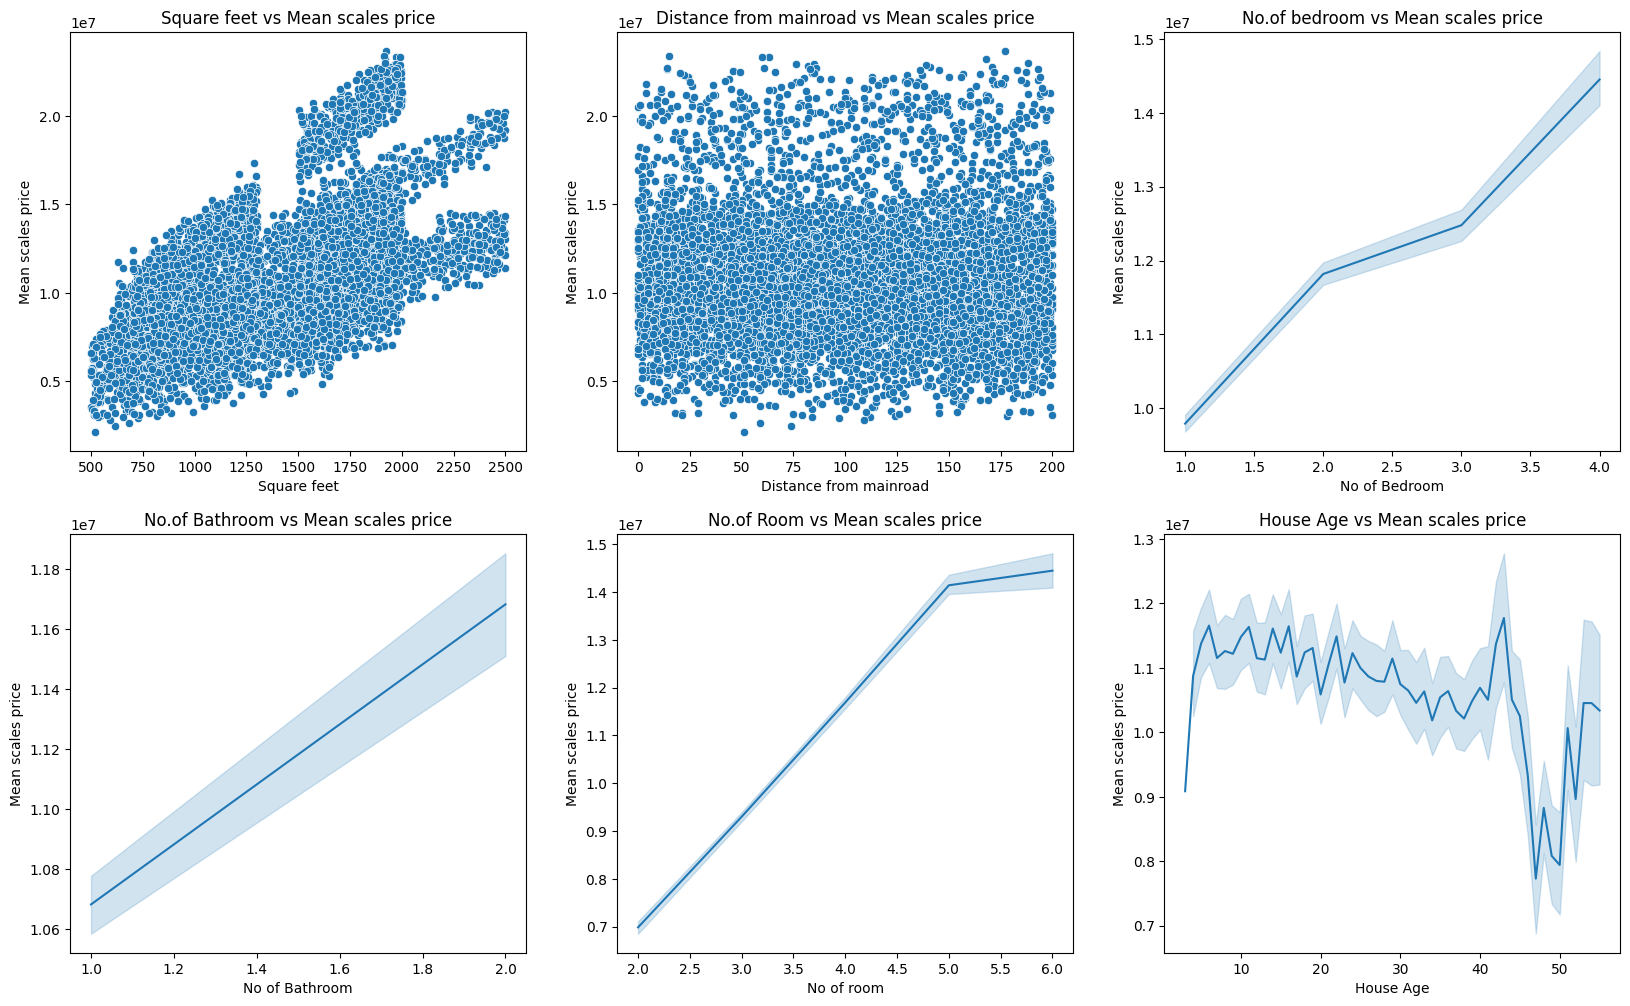

In [48]:
#int_sqft vs scale
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.scatterplot(df['int_sqft'],df['sales_price'])
plt.xlabel('Square feet')
plt.ylabel('Mean scales price')
plt.title('Square feet vs Mean scales price')
#dist_mainroad vs scale
plt.subplot(432)
sns.scatterplot(df['dist_mainroad'],df['sales_price'])
plt.xlabel('Distance from mainroad')
plt.ylabel('Mean scales price')
plt.title('Distance from mainroad vs Mean scales price')
# n_bedroom vs scale
plt.subplot(433)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.xlabel('No of Bedroom')
plt.ylabel('Mean scales price')
plt.title('No.of bedroom vs Mean scales price')
#n_bathroom vs scale
plt.subplot(434)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.xlabel('No of Bathroom')
plt.ylabel('Mean scales price')
plt.title('No.of Bathroom vs Mean scales price')
#n_room vs scale
plt.subplot(435)
sns.lineplot(df['n_room'],df['sales_price'])
plt.xlabel('No of room')
plt.ylabel('Mean scales price')
plt.title('No.of Room vs Mean scales price')
#house_age vs scale
plt.subplot(436)
sns.lineplot(df['house_age'],df['sales_price'])
plt.xlabel('House Age')
plt.ylabel('Mean scales price')
plt.title('House Age vs Mean scales price')


/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


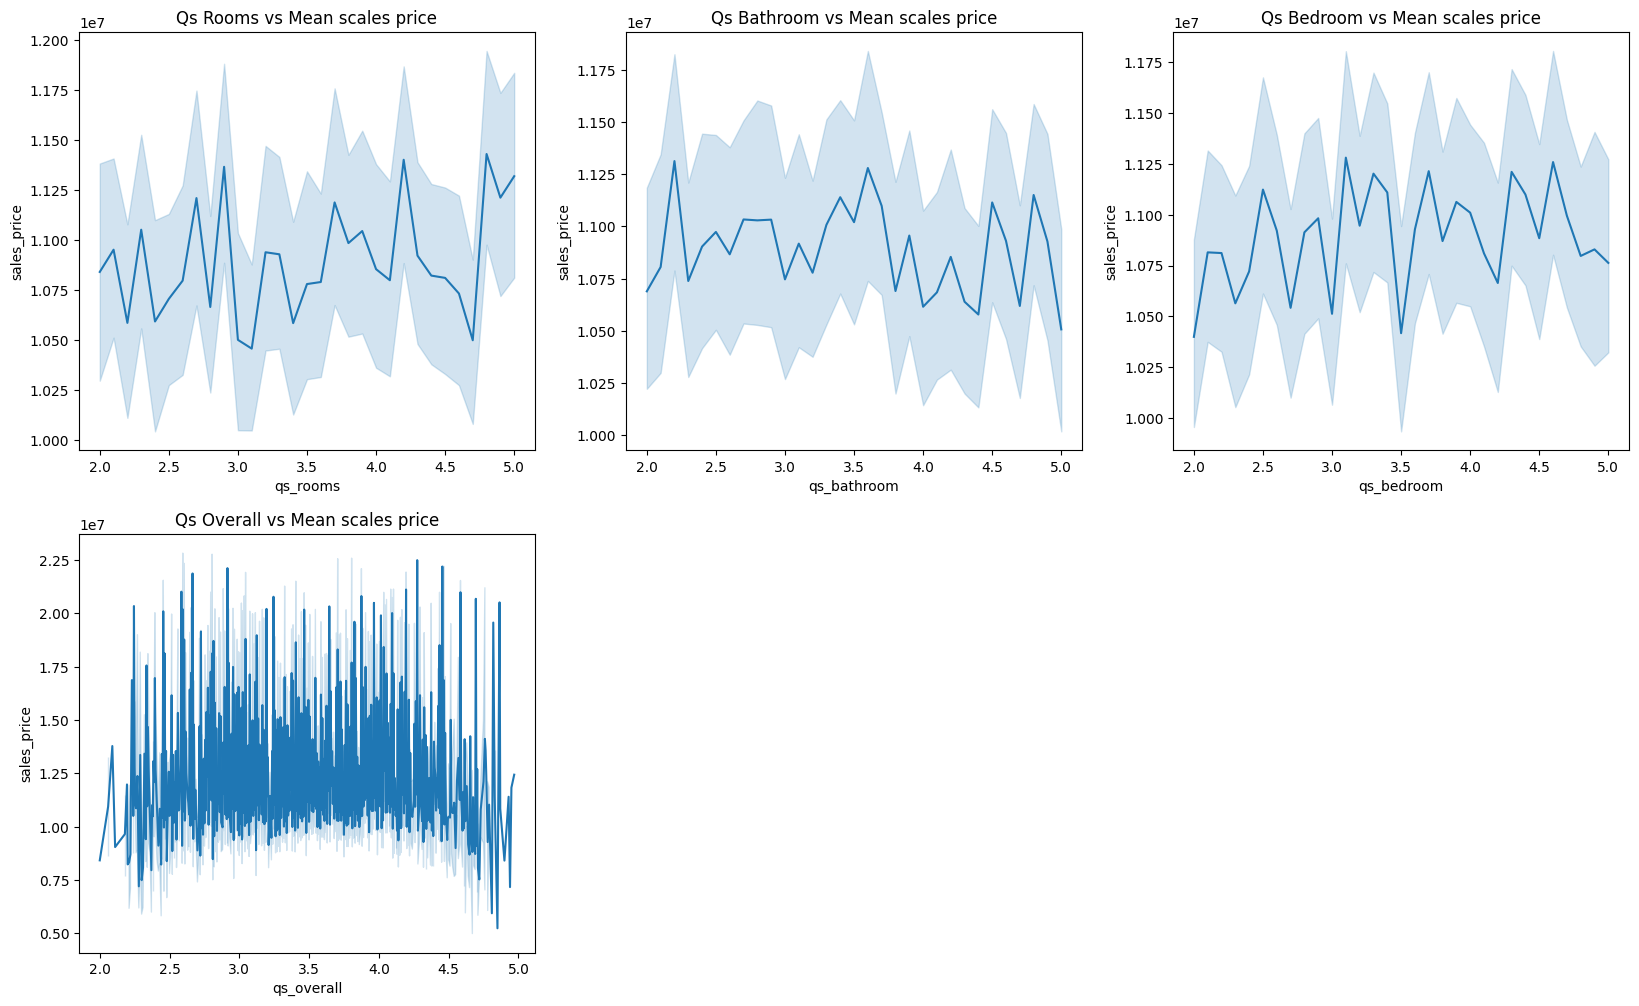

In [49]:
# qs_rooms vs scale
plt.figure(figsize=(20,25))
plt.subplot(4,3,1)
sns.lineplot(data=df, x='qs_rooms', y='sales_price')
plt.title('Qs Rooms vs Mean scales price')
#qs_bathroom vs scale
plt.subplot(432)
sns.lineplot(df['qs_bathroom'],df['sales_price'])
plt.title('Qs Bathroom vs Mean scales price')
#qs_bedroom vs scale
plt.subplot(433)
sns.lineplot(df['qs_bedroom'],df['sales_price'])
plt.title('Qs Bedroom vs Mean scales price')
#qs_overall vs scale
plt.subplot(434)
sns.lineplot(df['qs_overall'],df['sales_price'])
plt.title('Qs Overall vs Mean scales price')
plt.show()

In [50]:
del df['qs_rooms']
del df['qs_overall']
del df['qs_bathroom']
del df['qs_bedroom']
del df['dist_mainroad']
del df['sale_cond']
del df['utility_avail']


**Encode Categorical Variable**

In [51]:
df['area'].value_counts()

area
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

In [52]:
df['area']=df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df["street"]=df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone']=df['mzzone'].map({'A':0,"C":1,'I':2,'RH':4,'RL':5,'RM':6})
df['park_facil']=df['park_facil'].map({'No':0,'Yes':1})
df=pd.get_dummies(df,columns = ['buildtype'],dtype=int)




In [53]:
df.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,1,7406250,30,0,0,1


**Spliting the data**

In [54]:
 x=df.drop("sales_price",axis=1)
 y=df['sales_price']

In [55]:
x

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,1,0,44,1,0,0
1,5,1986,2,1,5,0,2,4,11,1,0,0
2,1,909,1,1,3,1,2,5,20,1,0,0
3,3,1855,3,2,5,0,1,2,22,0,0,1
4,0,1226,1,1,3,1,2,1,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,6,49,0,0,1
7105,3,1897,3,2,5,1,0,4,9,0,0,1
7106,3,1614,2,1,4,0,2,2,28,0,1,0
7107,0,787,1,1,2,1,1,5,32,1,0,0


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [58]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5331, 12) (1778, 12) (5331,) (1778,)


**Building Machine Learning Model**

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Linear Regression**

In [60]:
#linear regression
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(x_train,y_train)
print(linear_model.predict(x_test))
print(y_test)





[ 9068971.96126321 14363892.49893501 18629916.38675223 ...
  9345148.86363577 13029635.0608892   9146234.17817963]
6471     8624170
2044    13885100
5393    21252230
6590     6988500
5682    12798530
          ...   
3094    20613320
3439    11157010
4164     9480000
5534    13217550
332      8282500
Name: sales_price, Length: 1778, dtype: int64


In [61]:
linear_model.score(x_test,y_test)

0.9209592893189769

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model

0.9172584524987564

**KNN Regression**

In [63]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(x_train,y_train)
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [64]:
knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regression=KNeighborsRegressor(n_neighbors=k)
  knn_regression.fit(x_train_scaled,y_train)
  print("K value: ",k, "Train score: ",knn_regression.score(x_train_scaled,y_train),"Cross value score : ",cross_val_score(knn_regression,x_train_scaled,y_train,cv=10).mean())
  cross_val_knn.append(cross_val_score(knn_regression,x_train_scaled,y_train,cv=10).mean())


K value:  1 Train score:  0.9999961435632942 Cross value score :  0.9566808249318225
K value:  2 Train score:  0.9896649846844121 Cross value score :  0.9615681879183109
K value:  3 Train score:  0.9839683330587913 Cross value score :  0.9629426560044179
K value:  4 Train score:  0.9798862149870022 Cross value score :  0.9627441551026499
K value:  5 Train score:  0.9770035100590693 Cross value score :  0.9629661428137194
K value:  6 Train score:  0.9747874053826905 Cross value score :  0.9624899252035357
K value:  7 Train score:  0.9730765037810069 Cross value score :  0.9614772566846239
K value:  8 Train score:  0.971511972027101 Cross value score :  0.9609076223648719
K value:  9 Train score:  0.9701226251544599 Cross value score :  0.9600738289700519
K value:  10 Train score:  0.9686268841675483 Cross value score :  0.9594756024687147
K value:  11 Train score:  0.9672834125095237 Cross value score :  0.9585489678141231
K value:  12 Train score:  0.9660689832828367 Cross value score 

In [65]:
cross_val_knn=max(cross_val_knn)

In [66]:
print("The best K value is 3 and cross_val_score is",cross_val_knn)

The best K value is 3 and cross_val_score is 0.9629661428137194


In [67]:
#implementing KNN
knn_regression=KNeighborsRegressor(n_neighbors=3)
knn_regression.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [68]:
cross_val_knn_regression=cross_val_score(knn_regression,x_train_scaled,y_train,cv=15).mean()
cross_val_knn_regression

0.9632868340586891

**Decision Tree Regression**

In [69]:
max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regression=DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regression.fit(x_train,y_train)
  print("Depth: ",d,"Train score: ",dt_regression.score(x_train,y_train),'cross val score: ',cross_val_score(dt_regression,x_train,y_train,cv=10).mean())
  cross_val_dt.append(cross_val_score(dt_regression,x_train,y_train,cv=10).mean())

Depth:  1 Train score:  0.3581603275989873 cross val score:  0.35695113204389683
Depth:  2 Train score:  0.682345420908864 cross val score:  0.6817204610776237
Depth:  3 Train score:  0.8058115059473487 cross val score:  0.8047977583564533
Depth:  4 Train score:  0.8889588015761505 cross val score:  0.8846549428741761
Depth:  5 Train score:  0.9231138554154661 cross val score:  0.9179388571663065
Depth:  6 Train score:  0.9446993471100071 cross val score:  0.9368526838513219
Depth:  7 Train score:  0.9602602547360694 cross val score:  0.9502143300349717
Depth:  8 Train score:  0.9728753809294561 cross val score:  0.9602678210830347
Depth:  9 Train score:  0.9827127548453436 cross val score:  0.9666303652150268
Depth:  10 Train score:  0.9894735122532492 cross val score:  0.9708773326790933
Depth:  11 Train score:  0.9939485789236162 cross val score:  0.9729574590342602
Depth:  12 Train score:  0.9968552319556154 cross val score:  0.9731431703497015
Depth:  13 Train score:  0.9985317289

In [70]:
cross_val_dt=max(cross_val_dt)

In [71]:
print("The best depth is 14 and the cross_val_score is: ",cross_val_dt)

The best depth is 14 and the cross_val_score is:  0.9736283618101165


In [72]:
#impleting Decision tree
dt_regression=DecisionTreeRegressor(max_depth=14, random_state=0)
dt_regression.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [73]:
cross_val_dt_regression=cross_val_score(dt_regression,x_train,y_train,cv=10).mean()
cross_val_dt_regression

0.9734673700912889

**Random forest**

In [74]:
#choosing the best depth value
from sklearn.ensemble import RandomForestRegressor
max_depth=np.array([2,4,8,10,12,14,16,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regression=RandomForestRegressor(max_depth=d,random_state=0)
  rf_regression.fit(x_train,y_train)
  print("Depth: ",d,"cross_val_rf: ",cross_val_score(rf_regression,x_train,y_train,cv=10).mean())
  cross_val_rf.append(cross_val_score(rf_regression,x_train,y_train,cv=10).mean())

Depth:  2 cross_val_rf:  0.6830953773806483
Depth:  4 cross_val_rf:  0.8945342240121287
Depth:  8 cross_val_rf:  0.9753014506288512
Depth:  10 cross_val_rf:  0.9845727841175634
Depth:  12 cross_val_rf:  0.9870391026029293
Depth:  14 cross_val_rf:  0.9874825552079332
Depth:  16 cross_val_rf:  0.9875315541653917
Depth:  18 cross_val_rf:  0.9875253681672375
Depth:  20 cross_val_rf:  0.9875192522542233


In [75]:
cross_val_rf=max(cross_val_rf)
print("The best depth 20 and cross_val_score is: ",cross_val_rf)

The best depth 20 and cross_val_score is:  0.9875315541653917


In [76]:
#implementing random forest
rf_regression=RandomForestRegressor(max_depth=20,random_state=0)
rf_regression.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [77]:
cross_val_rf_regression=cross_val_score(rf_regression,x_train,y_train,cv=10).mean()
cross_val_rf_regression

0.9875192522542233

**Gradient Boosting Regression**

In [78]:
cross_val_xg=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regression=xgb.XGBRegressor(learning_rate=lr,n_estimators=100)
  xgb_regression.fit(x_train,y_train)
  print("Learning rate: ",lr, "cross_val_score:", cross_val_score(xgb_regression,x_train,y_train,cv=10).mean())
  cross_val_xg.append(cross_val_score(xgb_regression,x_train,y_train,cv=10).mean())

Learning rate:  0.01 cross_val_score: 0.8212022794949594
Learning rate:  0.05 cross_val_score: 0.9903560590500303
Learning rate:  0.08 cross_val_score: 0.9927449951744306
Learning rate:  0.1 cross_val_score: 0.9931221263036925
Learning rate:  0.2 cross_val_score: 0.9929011891867378
Learning rate:  0.25 cross_val_score: 0.9926380765268018
Learning rate:  0.3 cross_val_score: 0.9922555170498704


In [79]:
cross_val_xg=max(cross_val_xg)

In [80]:
print("The best learning rate 0.1 and cross_val_score is: ",cross_val_xg)

The best learning rate 0.1 and cross_val_score is:  0.9931221263036925


In [81]:
#implementing
xgb_regression=xgb.XGBRegressor(learning_rate=0.1,n_estimators=100)
xgb_regression.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
cross_val_xg_regression=cross_val_score(xgb_regression,x_train,y_train,cv=10).mean()
cross_val_xg_regression

0.9931221263036925

**Validation score for Machine learning models**

In [83]:
print("Cross validation score for Linear Regression Model: ",cross_val_linear_model)
print("Cross validation score for KNN Regression Model: ",cross_val_knn_regression)
print("Cross validation score for Decision Tree Regression Model: ",cross_val_dt_regression)
print("Cross validation score for Random Forest Regression Model: ",cross_val_rf_regression)
print("Cross validation score for Extreme-Gradient Boosting Model: ",cross_val_xg_regression)


Cross validation score for Linear Regression Model:  0.9172584524987564
Cross validation score for KNN Regression Model:  0.9632868340586891
Cross validation score for Decision Tree Regression Model:  0.9734673700912889
Cross validation score for Random Forest Regression Model:  0.9875192522542233
Cross validation score for Extreme-Gradient Boosting Model:  0.9931221263036925


**R2 score for Machine-learning model**

In [84]:
from sklearn.metrics import r2_score

In [85]:
y_pred_lr=linear_model.predict(x_test)
y_pred_knn=knn_regression.predict(x_test)
y_pred_dt=dt_regression.predict(x_test)
y_pred_rf=rf_regression.predict(x_test)
y_pred_xgb=xgb_regression.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [87]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [88]:
print("R2 score for Linear regression model: ",R2_score_lr)
print("R2 score for Decision Tree regression model: ",R2_score_dt)
print("R2 score for KNN regression model: ",R2_score_knn)
print("R2 score for Random Forest regression model: ",R2_score_rf)
print("R2 score for Extreme-Gradient Boosting regression model: ",R2_score_xgb)

R2 score for Linear regression model:  0.9209592893189769
R2 score for Decision Tree regression model:  0.976092107287223
R2 score for KNN regression model:  -2.514190824675685
R2 score for Random Forest regression model:  0.9882058653365527
R2 score for Extreme-Gradient Boosting regression model:  0.9932470179747579
